In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
import seaborn as sns 
sns.set()
from sklearn.cluster import KMeans

In [14]:
df = pd.read_csv('countries.csv')

In [16]:
df.head()

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450


In [18]:
df.shape

(241, 3)

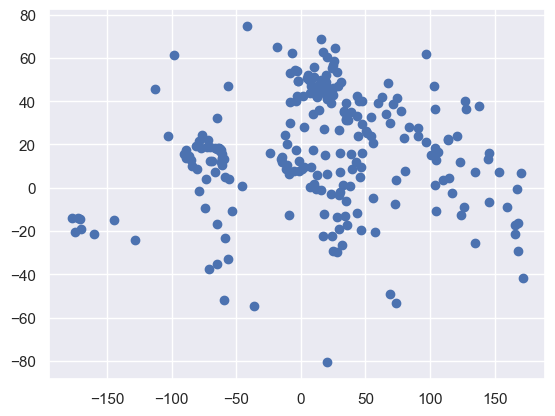

In [20]:
plt.scatter(df['Longitude'], df['Latitude'])

In [21]:
cluster_data=df.iloc[:,[1,2]]

In [22]:
cluster_data.head()

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450


In [25]:
ss = StandardScaler()
cluster_data = pd.DataFrame(ss.fit_transform(cluster_data), columns=['Longitude', 'Latitude'])

In [26]:
cluster_data.head()

,Longitude,Latitude
0,-1.171629,-0.175422
1,0.720657,0.628927
2,0.046226,-1.111849
3,-1.075368,0.039797
4,0.081187,0.904683


In [27]:
cluster_data.mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of      Longitude  Latitude
0    -1.171629 -0.175422
1     0.720657  0.628927
2     0.046226 -1.111849
3    -1.075368  0.039797
4     0.081187  0.904683
..         ...       ...
236  -2.593510 -1.166941
237   0.464368 -0.047553
238   0.151237 -1.742328
239   0.188681 -1.155809
240   0.217578 -1.365099

[241 rows x 2 columns]>

In [28]:
cluster_data.mean()

Longitude    6.080890e-17
Latitude     1.197751e-17
dtype: float64

In [29]:
cluster_data.std()

Longitude    1.002081
Latitude     1.002081
dtype: float64

In [30]:
kmeans = KMeans(4)

In [31]:
kmeans.fit(cluster_data)

KMeans(n_clusters=4)

In [32]:
identified_clusters = kmeans.fit_predict(cluster_data)

In [33]:
identified_clusters

array([2, 1, 0, 2, 1, 1, 1, 1, 0, 1, 2, 0, 3, 0, 2, 3, 1, 1, 0, 1, 0, 0,
       3, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 3, 3, 0, 0, 1, 0, 3, 0, 0,
       0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 0,
       1, 1, 0, 1, 3, 0, 1, 1, 3, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 2, 1, 2,
       3, 2, 3, 0, 2, 1, 2, 1, 3, 1, 3, 3, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       3, 1, 1, 0, 1, 3, 2, 2, 3, 1, 1, 3, 1, 0, 1, 2, 1, 3, 0, 1, 1, 1,
       3, 2, 1, 1, 1, 0, 3, 2, 3, 1, 0, 1, 3, 1, 1, 3, 0, 1, 2, 0, 0, 3,
       0, 3, 0, 3, 0, 2, 2, 1, 1, 3, 3, 3, 1, 1, 2, 2, 2, 3, 3, 3, 1, 2,
       3, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 0, 0, 0, 3, 0, 0, 3, 0, 2, 1, 0,
       0, 1, 1, 0, 2, 1, 1, 1, 0, 2, 0, 1, 2, 0, 0, 3, 1, 1, 3, 2, 2, 1,
       1, 3, 0, 0, 1, 0, 2, 1, 1, 2, 2, 2, 2, 3, 3, 2, 2, 0, 0, 0, 0])

In [34]:
new_dataframe = df.copy()

In [35]:
new_dataframe.head()

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450


In [36]:
new_dataframe['cluster_no'] = identified_clusters

In [37]:
new_dataframe.head()

,name,Longitude,Latitude,cluster_no
0,Aruba,-69.982677,12.520880,2
1,Afghanistan,66.004734,33.835231,1
2,Angola,17.537368,-12.293361,0
3,Anguilla,-63.064989,18.223959,2
4,Albania,20.049834,41.142450,1


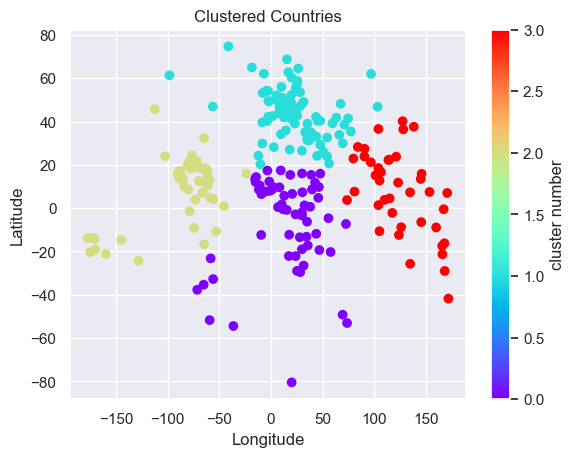

In [43]:
plt.scatter(new_dataframe['Longitude'], new_dataframe['Latitude'],c=new_dataframe['cluster_no'],cmap='rainbow')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clustered Countries')
plt.colorbar(label='cluster number')
plt.show()

In [45]:
wcss=[]
for i in range(1,11): 
    kmeans = KMeans(i)
    kmeans.fit(cluster_data) 
    wcss_iter = kmeans.inertia_ 
    wcss.append(wcss_iter)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [46]:
wcss

[481.99999999999994,
 304.03529335762437,
 182.71427961732408,
 140.72852430229963,
 109.20422047607421,
 88.48075009465327,
 70.99835689372881,
 60.86805052232666,
 52.253470820507125,
 45.65025206568243]

Text(0, 0.5, 'Within-cluster Sum of Squares')

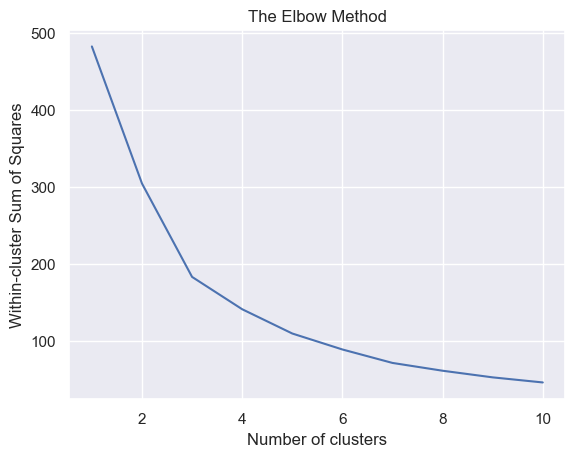

In [48]:
number_clusters = range(1,11) 
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method') 
plt.xlabel('Number of clusters') 
plt.ylabel('Within-cluster Sum of Squares')
